In [2]:
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
X_tensors = torch.tensor(df.iloc[:,0],dtype=torch.float32).unsqueeze(dim=1)
Y_tensors = torch.tensor(df.iloc[:,1],dtype=torch.float32).unsqueeze(dim=1)
Y_tensors

tensor([[ 39343.],
        [ 46205.],
        [ 37731.],
        [ 43525.],
        [ 39891.],
        [ 56642.],
        [ 60150.],
        [ 54445.],
        [ 64445.],
        [ 57189.],
        [ 63218.],
        [ 55794.],
        [ 56957.],
        [ 57081.],
        [ 61111.],
        [ 67938.],
        [ 66029.],
        [ 83088.],
        [ 81363.],
        [ 93940.],
        [ 91738.],
        [ 98273.],
        [101302.],
        [113812.],
        [109431.],
        [105582.],
        [116969.],
        [112635.],
        [122391.],
        [121872.]])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X_tensors,Y_tensors,test_size=0.2,shuffle=None,random_state=None)

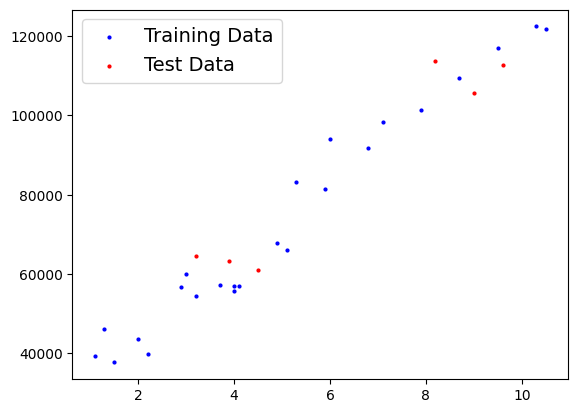

In [6]:
def plot_fn(X_train_data = X_train,
            y_train_data = y_train,
            X_test_data = X_test,
            y_test_data = y_test,
            prediction = None):
    plt.scatter(X_train_data,y_train_data,c="b",s=4, label="Training Data")
    plt.scatter(X_test_data,y_test_data,c="r",s=4, label="Test Data")
    if(prediction!=None):
        plt.scatter(X_test_data,prediction,c="g",s=4, label="Prediction Data")       
    plt.legend(prop={"size":14})
plot_fn()
plt.show()

In [7]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
    def forward(self ,x:torch.tensor):
        return self.weight * x + self.bias

In [8]:
torch.manual_seed(30)
model = LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([0.4705], requires_grad=True),
 Parameter containing:
 tensor([1.6563], requires_grad=True)]

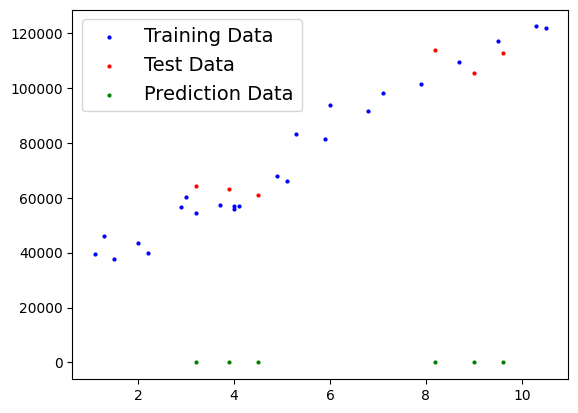

In [9]:
with torch.inference_mode():
    untrained_ypreds = model.forward(x=X_test)
untrained_ypreds
plot_fn(prediction=untrained_ypreds)

In [42]:
optimizer = torch.optim.SGD(params=model.parameters(),lr=15)
loss_fn = nn.L1Loss()

In [48]:
epochs = 100

for epoch in range (epochs):
    model.train()
    y_preds = model.forward(X_train)
    loss = loss_fn(y_preds,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
model.state_dict()

OrderedDict([('weight', tensor([9876.2129])), ('bias', tensor([23153.9648]))])

tensor(4175.0156, grad_fn=<MeanBackward0>)


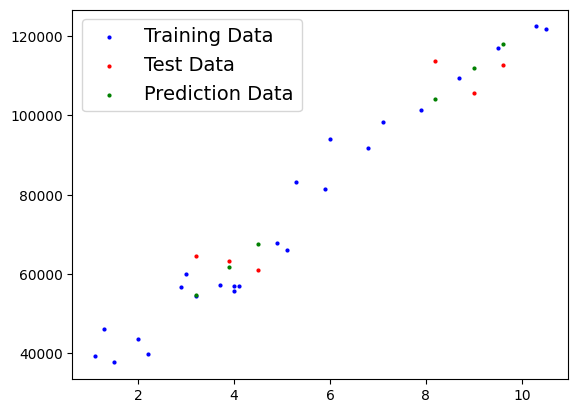

In [49]:
print(loss)
with torch.inference_mode():
    y_trained_preds = model.forward(X_test)
y_trained_preds
plot_fn(prediction=y_trained_preds)

In [50]:
list(model.parameters())

[Parameter containing:
 tensor([9876.2129], requires_grad=True),
 Parameter containing:
 tensor([23153.9648], requires_grad=True)]